Задание 1.

Выберите датасет, который имеет отношение к вашей области интересов или исследований. Датасет должен содержать неструктурированные данные, требующие разметки для решения конкретной задачи, например, анализа настроений или распознавания именованных сущностей.

In [1]:
# Импорт библиотек для работы с датасетом
import pandas as pd
import numpy as np

# Импортир библиотек для построения графиков
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("books.csv", on_bad_lines='skip')

In [3]:
df.head(5)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


Описание:

Этот набор данных, который был собран с помощью сайта Good book, содержит информацию о книгах, такую как автор, количество страниц, рейтинг и другую информацию. Мы также можем создать систему рекомендаций, которая будет рекомендовать книги и приближать людей к принятию правильного решения.

Название столбцов
    
1. Идентификатор книги (bookID): уникальный идентификатор книги
2. Наименование книги (title): категория курса, выбранного пользователем (например, Программирование, Бизнес, Искусство)
3. Авторы (authors): авторы книги
4. Средний рейтинг (average_rating): средний рейтинг читателей
5. ISBN (isbn): международный стандартный книжный номер (ISBN)
    ISBN- это цифровой идентификатор коммерческой книги, который должен быть уникальным
6. ISBN13 (isbn13): 13-значные ISBN были введены и использовались для повышения доступности ISBN по всему миру
7. Код языка (language_code): язык, на котором написана книга
8. Количество страниц (num_pages): количество страниц
9. Рейтинг (ratings_count): количество полученных уникальных оценок.
10. Количество рецензий (text_reviews_count): общее количество письменных рецензий, полученных на книгу
11. Дата публицаии (publication_date): дата публикации
12. Издательство(publisher): издательство 

In [4]:
def describe(df):
    """Return a Pandas dataframe describing the contents of a source dataframe including missing values."""
    
    variables = []
    dtypes = []
    count = []
    unique = []
    missing = []
    
    
    for item in df.columns:
        variables.append(item)
        dtypes.append(df[item].dtype)
        count.append(len(df[item]))
        unique.append(len(df[item].unique()))
        missing.append(df[item].isna().sum())
        

    output = pd.DataFrame({
        'variable': variables, 
        'dtype': dtypes,
        'count': count,
        'unique': unique,
        'missing value': missing
    })    
        
    return output

In [5]:
print(describe(df))

              variable    dtype  count  unique  missing value
0               bookID    int64  11123   11123              0
1                title   object  11123   10348              0
2              authors   object  11123    6639              0
3       average_rating  float64  11123     209              0
4                 isbn   object  11123   11123              0
5               isbn13    int64  11123   11123              0
6        language_code   object  11123      27              0
7            num_pages    int64  11123     997              0
8        ratings_count    int64  11123    5294              0
9   text_reviews_count    int64  11123    1822              0
10    publication_date   object  11123    3679              0
11           publisher   object  11123    2290              0


In [6]:
df.isna().any()

bookID                False
title                 False
authors               False
average_rating        False
isbn                  False
isbn13                False
language_code         False
  num_pages           False
ratings_count         False
text_reviews_count    False
publication_date      False
publisher             False
dtype: bool

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bookID,11123.0,2.131086e+04,1.309473e+04,1.000000e+00,1.027750e+04,2.028700e+04,3.210450e+04,4.564100e+04
average_rating,11123.0,3.934075e+00,3.504853e-01,0.000000e+00,3.770000e+00,3.960000e+00,4.140000e+00,5.000000e+00
isbn13,11123.0,9.759880e+12,4.429758e+11,8.987060e+09,9.780345e+12,9.780582e+12,9.780872e+12,9.790008e+12
num_pages,11123.0,3.364056e+02,2.411526e+02,0.000000e+00,1.920000e+02,2.990000e+02,4.160000e+02,6.576000e+03
ratings_count,11123.0,1.794285e+04,1.124992e+05,0.000000e+00,1.040000e+02,7.450000e+02,5.000500e+03,4.597666e+06
text_reviews_count,11123.0,5.420481e+02,2.576620e+03,0.000000e+00,9.000000e+00,4.700000e+01,2.380000e+02,9.426500e+04


In [8]:
df['title'].value_counts()

The Iliad                                               9
The Brothers Karamazov                                  9
The Odyssey                                             8
Anna Karenina                                           8
'Salem's Lot                                            8
                                                       ..
The Noonday Demon: An Atlas of Depression               1
The Noonday Demon: An Anatomy of Depression             1
My Secret: A PostSecret Book                            1
The Secret Lives of Men and Women: A PostSecret Book    1
Las aventuras de Tom Sawyer                             1
Name: title, Length: 10348, dtype: int64

Задание 2.

Выполните разметку на основе правил (rule-based labeling) на подмножестве выбранного датасета. Разработайте и реализуйте набор правил или условий, которые позволят автоматически присваивать метки данным на основе определенных шаблонов или критериев.

In [9]:
import matplotlib.pyplot as plt

In [37]:
pip install pivottablejs

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [40]:
from pivottablejs import pivot_ui

In [49]:
pivot_ui(df, rows=['title'], cols=['language_code'])

In [10]:
def rule_rating(row):
    if 4.7 < row['average_rating'] <=5:
        return "Highest"
    elif 4.4 < row['average_rating'] <= 4.7:
        return "Very High"
    elif 4.0 < row['average_rating'] <= 4.4:
        return "High"
    elif 3.2 < row['average_rating'] <= 4.0:
        return "Medium"
    elif 2.5 < row['average_rating'] <= 3.2:
        return "Below medium"
    else:
        return "Low"

In [11]:
df[['average_rating']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   average_rating  11123 non-null  float64
dtypes: float64(1)
memory usage: 87.0 KB


In [12]:
# Выполним разметку набора данных, основанную на правилах
# Добавим новое поле "book rating", куда запишем значения

df['book rating'] = df.apply(rule_rating, axis=1)

In [13]:
### Проверим - все ли книги были размечены по рейтингу
df['book rating'].value_counts()

### Вывод: переменная-отклик заполнена полностью

Medium          6203
High            4250
Very High        445
Below medium     148
Highest           40
Low               37
Name: book rating, dtype: int64

Задание 3.

Выполните разметку вручную отдельного подмножества выбранного датасета с помощью выбранного вами инструмента разметки.

In [14]:
# Выделим из общего набора данных необходимые данные для ручной разметки в отдельный файл

df_new = df[['title', 'average_rating', 'ratings_count', 'text_reviews_count', 'book rating' ]]

FileNameFull = "book_rating_manual.csv"

df_new.to_csv(FileNameFull, index = False)

# Разметку для первых 30 книг (для учебных целей) проведем в Label Studio.
# Скриншот этой работы приложен в папку вместе с .ipynb файлом

In [15]:
# Загрузим датасета с ручной разметкой
manual_df = pd.read_csv('book_rating_manual_new.csv', engine='python')
manual_df.head(5)

,annotation_id,annotator,average_rating,book rating,created_at,id,lead_time,ratings_count,sentiment,text_reviews_count,title,updated_at
0,1,1,4.57,Very High,2024-08-03T19:40:52.907103Z,1,11.853,2095690,Very High,27591,Harry Potter and the Half-Blood Prince (Harry ...,2024-08-03T19:40:52.907103Z
1,2,1,4.49,Very High,2024-08-03T19:41:13.537899Z,2,5.978,2153167,Very High,29221,Harry Potter and the Order of the Phoenix (Har...,2024-08-03T19:41:13.537899Z
2,3,1,4.42,Very High,2024-08-03T19:41:18.361612Z,3,2.838,6333,High,244,Harry Potter and the Chamber of Secrets (Harry...,2024-08-03T19:41:18.361612Z
3,4,1,4.56,Very High,2024-08-03T19:41:53.865779Z,4,29.643,2339585,Very High,36325,Harry Potter and the Prisoner of Azkaban (Harr...,2024-08-03T19:41:53.865779Z
4,5,1,4.78,Highest,2024-08-03T19:41:58.605525Z,5,2.651,41428,Highest,164,Harry Potter Boxed Set Books 1-5 (Harry Potte...,2024-08-03T19:41:58.605525Z


In [16]:
manual_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   annotation_id       30 non-null     int64  
 1   annotator           30 non-null     int64  
 2   average_rating      30 non-null     float64
 3   book rating         30 non-null     object 
 4   created_at          30 non-null     object 
 5   id                  30 non-null     int64  
 6   lead_time           30 non-null     float64
 7   ratings_count       30 non-null     int64  
 8   sentiment           30 non-null     object 
 9   text_reviews_count  30 non-null     int64  
 10  title               30 non-null     object 
 11  updated_at          30 non-null     object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.9+ KB


Задание 4.

Объедините данные, размеченные вручную, с данными, размеченными на основе правил. Объедините два подмножества размеченных данных в один набор данных, сохранив при этом соответствующую структуру и целостность.

In [18]:
# Поменяем столбцы местами для объединения Dataset
redefine = ['title', 'average_rating', 'ratings_count', 'text_reviews_count', 'book rating', 'sentiment', 'id', 'updated_at', 'lead_time', 'created_at', 'annotator', 'annotation_id']
df_edit = manual_df[redefine]
df_edit.head()

,title,average_rating,ratings_count,text_reviews_count,book rating,sentiment,id,updated_at,lead_time,created_at,annotator,annotation_id
0,Harry Potter and the Half-Blood Prince (Harry ...,4.57,2095690,27591,Very High,Very High,1,2024-08-03T19:40:52.907103Z,11.853,2024-08-03T19:40:52.907103Z,1,1
1,Harry Potter and the Order of the Phoenix (Har...,4.49,2153167,29221,Very High,Very High,2,2024-08-03T19:41:13.537899Z,5.978,2024-08-03T19:41:13.537899Z,1,2
2,Harry Potter and the Chamber of Secrets (Harry...,4.42,6333,244,Very High,High,3,2024-08-03T19:41:18.361612Z,2.838,2024-08-03T19:41:18.361612Z,1,3
3,Harry Potter and the Prisoner of Azkaban (Harr...,4.56,2339585,36325,Very High,Very High,4,2024-08-03T19:41:53.865779Z,29.643,2024-08-03T19:41:53.865779Z,1,4
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,4.78,41428,164,Highest,Highest,5,2024-08-03T19:41:58.605525Z,2.651,2024-08-03T19:41:58.605525Z,1,5


In [100]:
import warnings
warnings.filterwarnings("ignore")

In [19]:
# Удалим столбец "book rating" т.к. в качестве значений для этого столбца будем использовать значения,
# проставленные вручную из столбца "sentiment"

df_edit.drop('book rating', axis=1, inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_672\2216082602.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_edit.drop('book rating', axis=1, inplace=True)


In [20]:
# Переименуем "sentiment" в "book rating" 
df_edit.rename(columns={'sentiment': 'book rating'}, inplace=True)

# Удалим не нужные столбцы
df_edit.drop('id', axis=1, inplace=True)
df_edit.drop('updated_at', axis=1, inplace=True)
df_edit.drop('lead_time', axis=1, inplace=True)
df_edit.drop('created_at', axis=1, inplace=True)
df_edit.drop('annotator', axis=1, inplace=True)
df_edit.drop('annotation_id', axis=1, inplace=True)

df_edit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               30 non-null     object 
 1   average_rating      30 non-null     float64
 2   ratings_count       30 non-null     int64  
 3   text_reviews_count  30 non-null     int64  
 4   book rating         30 non-null     object 
dtypes: float64(1), int64(2), object(2)
memory usage: 1.3+ KB


C:\Users\USER\AppData\Local\Temp\ipykernel_672\3000648334.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_edit.rename(columns={'sentiment': 'book rating'}, inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_672\3000648334.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_edit.drop('id', axis=1, inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_672\3000648334.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d

In [21]:
# Объединим два подмножества в один набор данных
final_df = pd.concat([df, df_edit], ignore_index=True)

# Проверим чтобы всё было на месте
final_df.info()

# Сохраняем объединенный набор данных в файл
final_df.to_csv('df_ready_to_learn.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11153 entries, 0 to 11152
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  float64
 1   title               11153 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11153 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  float64
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  float64
 8   ratings_count       11153 non-null  int64  
 9   text_reviews_count  11153 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
 12  book rating         11153 non-null  object 
dtypes: float64(4), int64(2), object(7)
memory usage: 1.1+ MB


Задание 5.

Обучите модель машинного обучения, используя объединенный набор размеченных данных. Разделите датасет на обучающий и тестовый наборы и используйте обучающий набор для обучения модели.

In [24]:
# Чтение подготовленого файла файла
df_learn = pd.read_csv('df_ready_to_learn.csv')
df_learn

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,book rating
0,1.0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9.780440e+12,eng,652.0,2095690,27591,9/16/2006,Scholastic Inc.,Very High
1,2.0,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9.780439e+12,eng,870.0,2153167,29221,9/1/2004,Scholastic Inc.,Very High
2,4.0,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9.780440e+12,eng,352.0,6333,244,11/1/2003,Scholastic,Very High
3,5.0,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9.780440e+12,eng,435.0,2339585,36325,5/1/2004,Scholastic Inc.,Very High
4,8.0,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9.780440e+12,eng,2690.0,41428,164,9/13/2004,Scholastic,Highest
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11148,NaN,Annals of the Former World,NaN,4.34,NaN,NaN,NaN,NaN,3115,228,NaN,NaN,High
11149,NaN,Coming Into the Country,NaN,4.22,NaN,NaN,NaN,NaN,5704,261,NaN,NaN,High
11150,NaN,La Place de la Concorde Suisse,NaN,3.92,NaN,NaN,NaN,NaN,698,52,NaN,NaN,Medium
11151,NaN,The Heidi Chronicles,NaN,3.75,NaN,NaN,NaN,NaN,1423,70,NaN,NaN,High


In [50]:
# Подготовка данных для обучения
df_learn['book rating'] = df_learn['book rating'].replace({'Highest': 0, 'Very High': 1, 'High': 2, 'Medium': 3, 'Below medium': 4, 'Low': 5})

In [39]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [40]:
# pip install tensorflow==1.2.0 --ignore-installed

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [52]:
# Разделение выборок на обучающую и тестовую
X = df_learn[['average_rating']].values
y = df_learn['book rating'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [54]:
# Определим простую модель ИНС прямого распространения с тремя слоями нейронов для двух входных переменных и трех выходов.
model = Sequential([
    Dense(10, input_dim=1, activation='relu'),
    Dense(10, activation='relu'),
    Dense(6, activation='softmax')
])

In [55]:
# Компиляция модели
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [56]:
# Обучение модели
history = model.fit(X_train, y_train, epochs=75, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/75
244/244 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2372 - loss: 1.7923 - val_accuracy: 0.5598 - val_loss: 1.2890
Epoch 2/75
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5471 - loss: 1.1281 - val_accuracy: 0.5598 - val_loss: 0.9194
Epoch 3/75
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5602 - loss: 0.9367 - val_accuracy: 0.5598 - val_loss: 0.9082
Epoch 4/75
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5552 - loss: 0.9411 - val_accuracy: 0.5598 - val_loss: 0.9043
Epoch 5/75
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5607 - loss: 0.9330 - val_accuracy: 0.5598 - val_loss: 0.9029
Epoch 6/75
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5520 - loss: 0.9353 - val_accuracy: 0.5598 - val_loss: 0.8998
Epoch 7/75
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5545 - loss: 0.9170 - val_accuracy: 0.5598 - val_loss: 0.8979
Epoch 8/75
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5601 - loss: 0.9102 - val_accuracy: 0.

Задание 6.

Оценить эффективность обученной модели на тестовом датасете. Используйте подходящие метрики оценки. Интерпретируйте результаты и проанализируйте эффективность модели в решении задачи разметки.

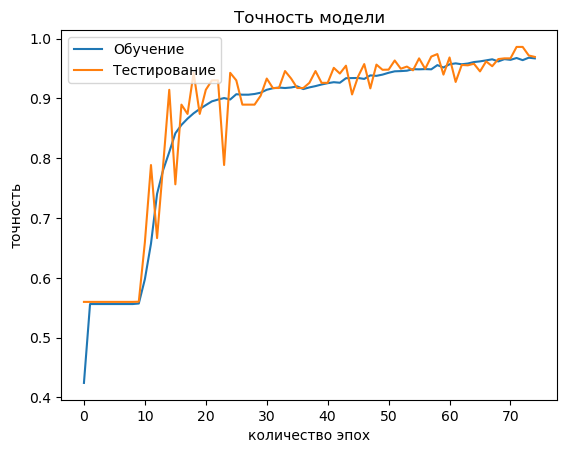

In [57]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Точность модели')
plt.ylabel('точность')
plt.xlabel('количество эпох')
plt.legend(['Обучение', 'Тестирование'], loc='upper left')
plt.show()

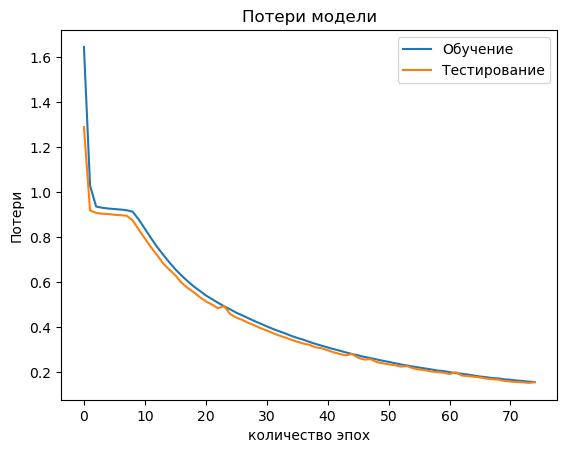

In [58]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Потери модели')
plt.ylabel('Потери')
plt.xlabel('количество эпох')
plt.legend(['Обучение', 'Тестирование'], loc='upper right')
plt.show()

In [59]:
# Расчет некоторых других метрик качества модели
loss, accuracy = model.evaluate(X_test, y_test)
y_test_predicted = np.argmax(model.predict(X_test), axis=1)
f1 = f1_score(y_test, y_test_predicted, average='weighted')
print(f'Test Loss (Потери): {loss},\nTest Accuracy (Точность): {accuracy}')
print(f'F-score = {f1}')

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9667 - loss: 0.1619
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Test Loss (Потери): 0.15661872923374176,
Test Accuracy (Точность): 0.969515860080719
F-score = 0.9679972072168832


Вывод: эффективность модели в решении задачи разметки при точности 96.95% можно считать хорошей.